# Exploratory Data Analysis of an Exoplanet dataset


## Introduction

In this Notebook, I will carry out an Exploratory Data Analysis (EDA) based on the dataset with information about Exoplanets (remember that this analysis is the second step of the project and the emphasis is on first getting the raw data).

Otra opción de inicio: This Notebook makes up the second part of the project, which consists of exploring the data extracted and finding valuable insights. INCLUIR IMAGEN AL FINAL CHULA

The Notebook's structure is:
  
1.   **EDA**: a fundamental part for any data analysis, which can be divided in the following sections:

  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  
2.   **Insights**: based on the previous analysis
3.   **Conclusion**: my view on the entire project and other personal comments.






In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/Documentos/RawData&EDA/"
import os
os.chdir(PATH)

Mounted at /content/drive


In [ ]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## EDA

### Dataset information

Once everything is set, the analysis begins

In [ ]:
# Loading the dataset
df = pd.read_csv("exoplanet_data.csv")
pd.set_option("display.max_columns", None)

In [ ]:
df.head()
# IMPORTANT: the explanation of each attribute is on the "AttributesExplained.txt" file

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,Transit,2004,OGLE,3.101278,14.011,197.046,0.4,NaN,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,0,Radial Velocity,2004,McDonald Observatory,2.808000,NaN,NaN,NaN,NaN,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,5.600000,NaN,NaN,NaN,4.50,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,237.600000,NaN,NaN,NaN,4.50,41.3342
4,HR 8799 c,HR 8799,1,4,0,0,Imaging,2008,Gemini Observatory,69000.000000,13.000,3000.000,NaN,0.06,41.2441


In [ ]:
# Basic info

print(f'Data dimensions: {df.shape[0]} rows, {df.shape[1]} columns')
print('---------------------------------')

print(f'Types of attributes: \n{df.dtypes.value_counts()}')
print('---------------------------------')

print(f'Attribute per type: \n{df.dtypes}')


Data dimensions: 35181 rows, 15 columns
---------------------------------
Types of attributes: 
float64    6
int64      5
object     4
dtype: int64
---------------------------------
Attribute per type: 
pl_name             object
hostname            object
sy_snum              int64
sy_pnum              int64
sy_mnum              int64
cb_flag              int64
discoverymethod     object
disc_year            int64
disc_facility       object
pl_orbper          float64
pl_rade            float64
pl_masse           float64
pl_dens            float64
st_age             float64
sy_dist            float64
dtype: object


In [ ]:
# Statistical data for numerical variables

df.describe()

,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
count,35181.000000,35181.000000,35181.0,35181.000000,35181.000000,3.211000e+04,24211.000000,3607.000000,1881.000000,7132.000000,34359.000000
mean,1.081976,1.878883,0.0,0.002246,2015.301299,1.359459e+04,5.303669,723.725349,2.794426,4.571783,739.503195
std,0.303644,1.193584,0.0,0.047334,3.781024,2.244698e+06,70.262559,1505.228689,5.739811,3.552458,778.399024
min,1.000000,1.000000,0.0,0.000000,1992.000000,9.070629e-02,0.270000,0.020000,0.010000,0.000000,1.301190
25%,1.000000,1.000000,0.0,0.000000,2014.000000,4.460782e+00,1.550000,15.400000,0.511000,2.100000,304.645000
50%,1.000000,1.000000,0.0,0.000000,2016.000000,1.052629e+01,2.280000,186.876000,1.130000,3.985000,613.129000
75%,1.000000,2.000000,0.0,0.000000,2016.000000,2.747856e+01,3.230000,624.534390,3.200000,5.890000,961.405000
max,4.000000,8.000000,0.0,1.000000,2023.000000,4.020000e+08,4282.980000,25426.400000,140.000000,16.800000,8800.000000


sy_mnum, which refers to the number of moons the exoplanet has, is always constant. In other words, there is no change in the data provided. It won't add any insight to the problem and therefore should be deleted.

In [ ]:
# Null values (count and %)

null_values = pd.DataFrame()
null_values['#'] = df.isnull().sum()
null_values['%'] = null_values['#'] / len(df)
null_values

,#,%
pl_name,0,0.000000
hostname,0,0.000000
sy_snum,0,0.000000
sy_pnum,0,0.000000
sy_mnum,0,0.000000
cb_flag,0,0.000000
discoverymethod,0,0.000000
disc_year,0,0.000000
disc_facility,0,0.000000
pl_orbper,3071,0.087291


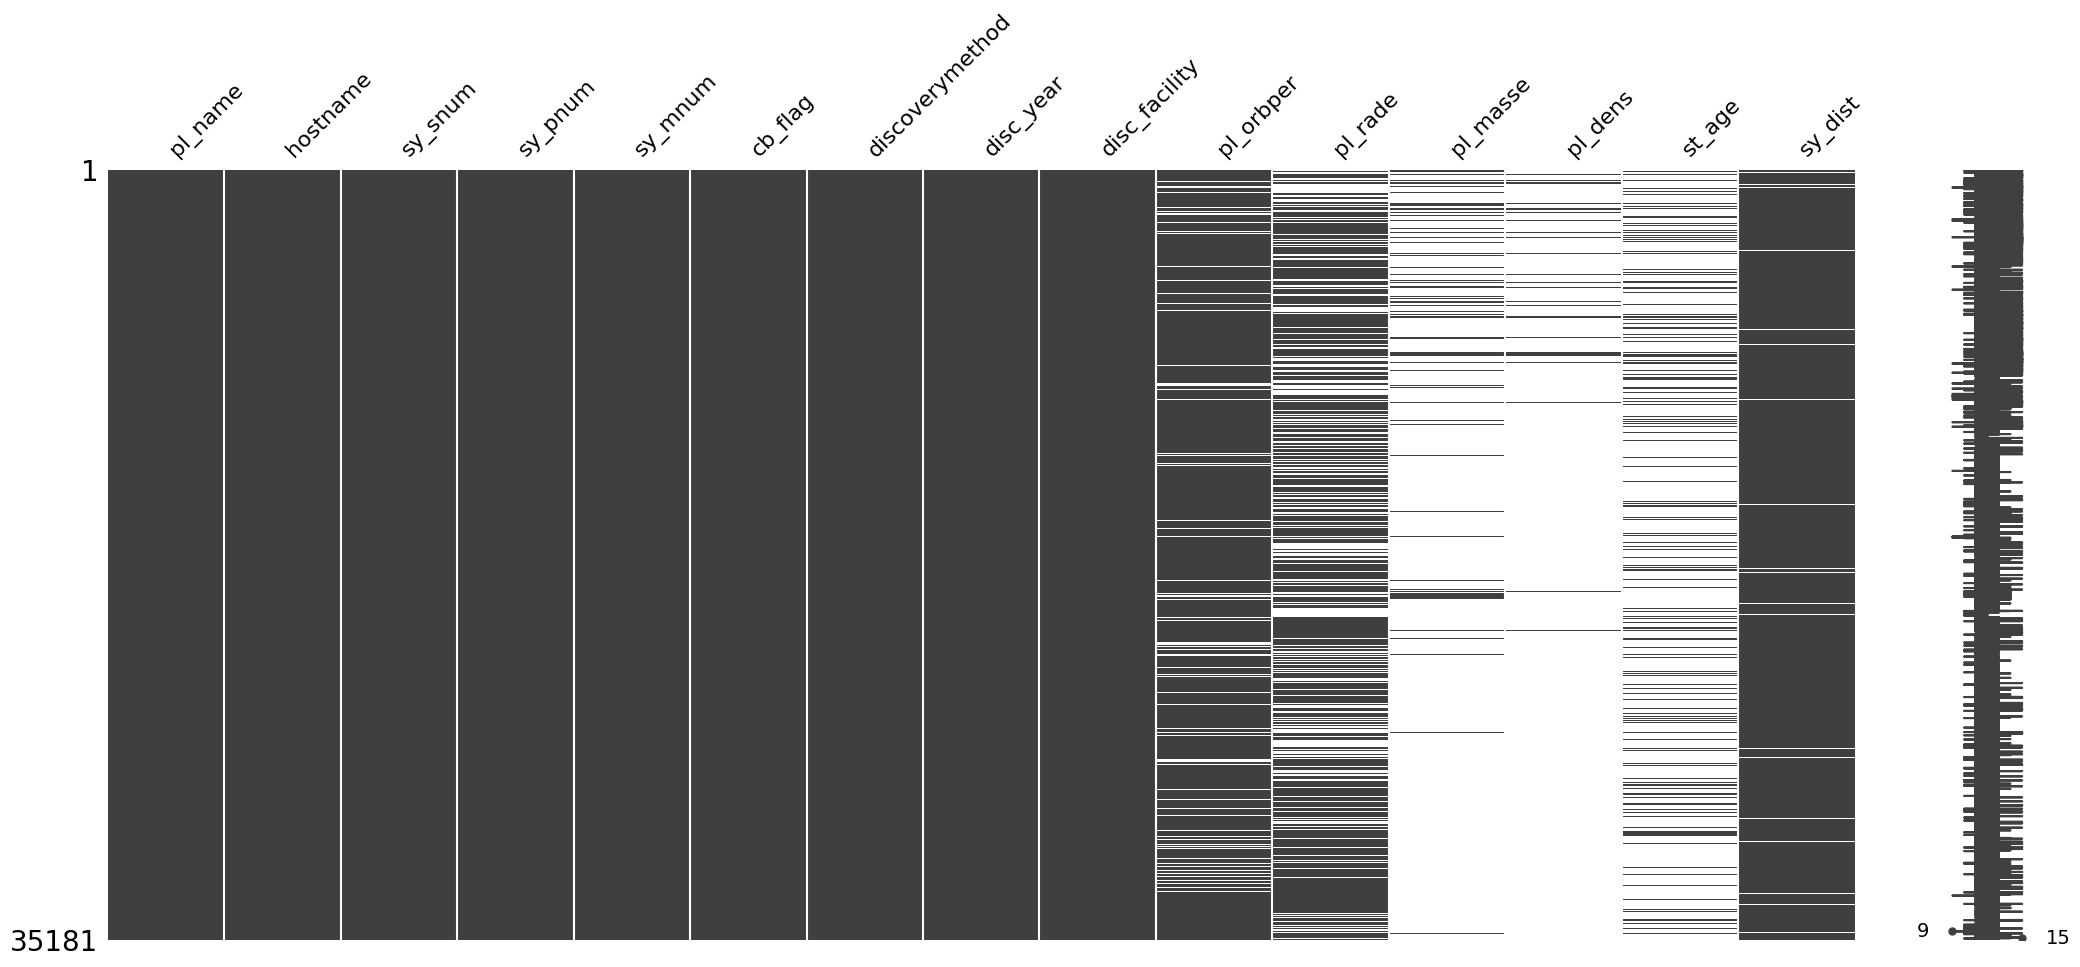

In [ ]:
# Null values visualization
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

The mass and density of the exoplanet, as well as the age of the host star are mostly Null. They can't add valuable information, so it might be better to delete them.

In [21]:
# Variable elimination: pl_masse, pl_dense, st_age and sy_mnum
df.drop(['pl_masse', 'pl_dens','st_age'], axis= 1,  inplace=True)

At around 30% it also stands the radius of the exoplanet (measured in units of the radius of the Earth), so it is worth considering an imputation method? pl_orber also has about 10% of Null values

In [ ]:
# Code

In [ ]:
# Categorical variables

So before we start plotting, the dataset looks like this:

In [22]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,Transit,2004,OGLE,3.101278,14.011,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,0,Radial Velocity,2004,McDonald Observatory,2.808000,NaN,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,5.600000,NaN,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,237.600000,NaN,41.3342
4,HR 8799 c,HR 8799,1,4,0,0,Imaging,2008,Gemini Observatory,69000.000000,13.000,41.2441


### Plots

In [ ]:
# Heatmap

## Insights

texto

## Conclusion

texto conclusión